Bnb interval method

In [1]:
from sympy import *
import interval as ival
import intconv as iconv
import matplotlib.pyplot as plt
import numpy as np
import bnbcore as bc
import math
from problems import *

In [2]:
ival_dict = {"cos" : ival.cos, "sin" : ival.sin, "exp" : ival.exp, "log" : ival.log}

In [3]:
problem = problems['absxsin']
print(problem)

{'f': Abs(0.25*x - 0.25) + Abs(sin(0.785398163397448*x + 2.35619449019234)) + 1, 'ab': [-10, 10], 'eps': 0.001, 'f*': 1}


In [4]:
main_int = ival.Interval(problem['ab'])
f = lambdify(x, problem['f'])
fi = lambdify(x, problem['f'], ival_dict)
print(main_int)
print(fi(main_int))
print(f(0))


[-10, 10]
[1, 4.75]
1.957106781186551


In [5]:
def split_ival(s):
    a = s.x[0]
    b = s.x[1]
    c = s.mid()
    sl = ival.Interval([a, c])
    sr = ival.Interval([c, b])
    return [sl, sr]

In [6]:
def vizual(flist, a, b):
    colors = ['r-', 'b-', 'g-']
    step = (b-a)/100.
    ta = np.arange(a, b + step, step)
    ln = len(ta)
    fta = np.arange(ln).astype(float)
    j = 0
    for f in flist:
        for i in range(ln):
            fta[i] = f(ta[i])
        plt.plot(ta, fta, colors[j])
        j = j + 1
    plt.show()

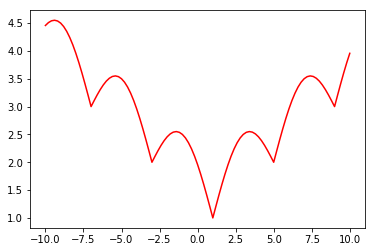

In [7]:
vizual([f], problem['ab'][0], problem['ab'][1])

In [10]:
def solve(key):
    problem = problems[key]
    main_int = ival.Interval(problem['ab'])
    f = lambdify(x, problem['f'])
    fi = lambdify(x, problem['f'], ival_dict)
    return bc.bnb(problem, [main_int], 1e5, f, fi, split_ival)

In [11]:
i = 1
for k in problems.keys():
#     print(problems[k])
    print(solve(k)['steps'])
    print("\n")
    i = i + 1

35


72953


63


159


183


11


273


65


189


857


35


125


51


